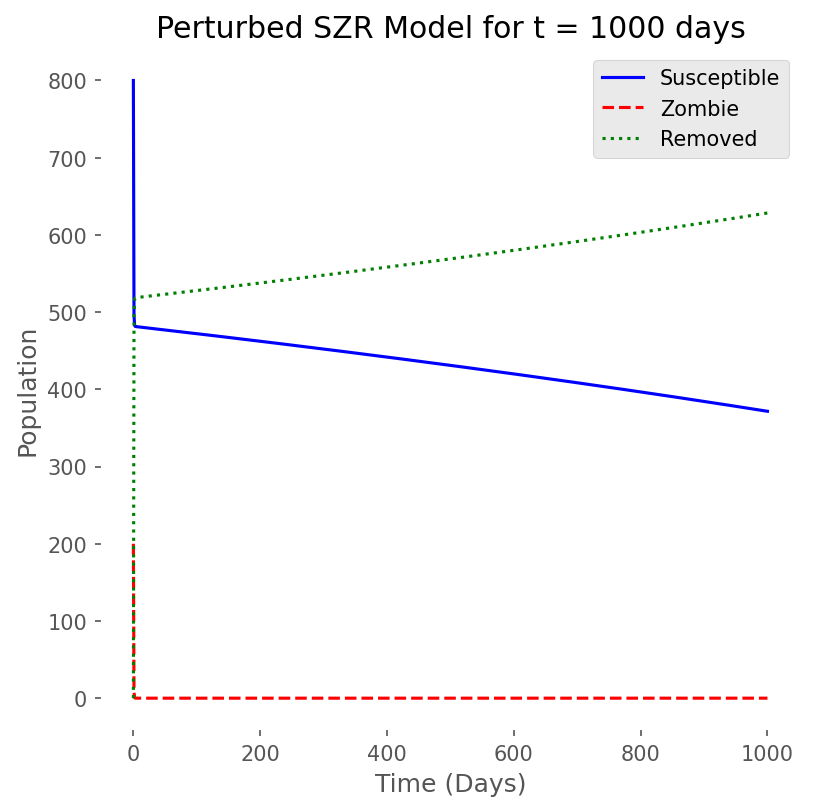

In [4]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""This simple program tries to solve the ODE of the Perturbed SZR model and create a numerical solution.
    After that, this program draws the solution graph for the Susceptible, Zombie and Recovered
    Population. This simple graph helps us to understand the actual scenario of the population
    from the SZR model after a certain number of days. We can change the value of the Perturbation
    Parameter Mu to investigate the change of behaviour and stabality of the SZR model.
    
    Reference: Allen, Robert F., Cassandra Jens, and Theodore J. Wendt. 2014.
   “Perturbations in Epidemiological Models”. Letters in Biomathematics 1 (2), 173-80.
   Link- https://doi.org/10.1080/23737867.2014.11414478.

   Part of MS Thesis at Universität Koblenz-Landau
   Note: this program uses the following libraries-  Numpy, Matplotlib, Scipy
   Python Version 3.7
"""

# importing libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(6, 6), dpi=150)
 
# For a nice looking plot
plt.style.use('ggplot')

# Parameter values
beta = 0.0095
alpha = 0.005
zeta = 0.0001
N = 1000  # initial population

# Perturbation Parameter Mu, change this value to see different results
u = 0.175

# Defining Function of the SZR ODE
def model(t, x):
    S = x[0] # Intital Susceptible Population
    Z = x[1] # Zombies
    dsdt = - beta*S*Z # Susceptible
    dzdt = zeta*(N - S - Z) + beta*S*Z - alpha*(S**(1 + u))*Z # Zombies
    dxdt = [dsdt, dzdt]
    return dxdt

# Initial Condition. Susceptible= 800, Zombie= 200
x0 = [800, 200]

# Time, as in number of days. Total days= 1000
t = np.array([0, 1000])
tspan = np.linspace(t[0], t[1], 1001)

# Calculating numerical solution of the given ODEs
x = solve_ivp(model, t, x0, t_eval=tspan)

time = x.t
susceptible = x.y[0];
zombie = x.y[1];
recovered = (N - susceptible - zombie);

# Plot
plt.plot(time, susceptible, 'b-', label="Susceptible") # Susceptible Population Graph
plt.plot(time, zombie, 'r--', label="Zombie") # Zombie Population Graph
plt.plot(time, recovered, 'g:', label="Removed") # Recovered Population Graph
plt.ylabel('Population')
plt.xlabel('Time (Days)')
plt.title('Perturbed SZR Model for t = 1000 days')
plt.legend(loc='best')
ax = plt.gca()
ax.set_facecolor('w')
plt.show()

__author__ = "Md Tariqul Islam"
__version__ = "1.0"
__maintainer__ = "Tariqul"
__email__ = "tariquldipu@uni-koblenz.de"
__status__ = "Final"

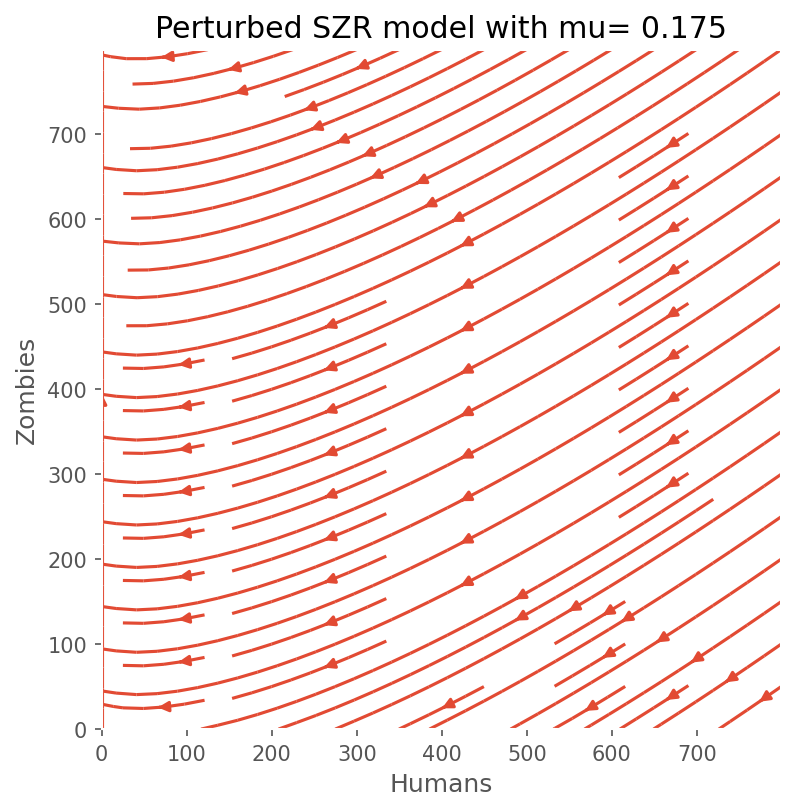

In [10]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""This program plots the Phase Portrait for the Perturbed SZR Model
    
    Reference: Allen, Robert F., Cassandra Jens, and Theodore J. Wendt. 2014.
   “Perturbations in Epidemiological Models”. Letters in Biomathematics 1 (2), 173-80.
   Link- https://doi.org/10.1080/23737867.2014.11414478.

   Part of MS Thesis at Universität Koblenz-Landau
   Note: this program uses the following libraries-  Numpy, Matplotlib
   Python Version 3.7
"""
# Phase Portrait For Perturbed SZR Model

# importing libraries
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(6, 6), dpi=150)


# Parameter values
beta = 0.0095
alpha = 0.005
zeta = 0.0001
N = 1000  #initial population

x = np.arange(0, 800, 1)
y = np.arange(0, 800, 1)
S, Z = np.meshgrid(x, y)

# range of values for Mu, with an increment of 0.005
mu = 0.175 

S_dash = - beta*S*Z #SZR model differential equation
Z_dash = zeta*(N - S - Z) + beta*S*Z - alpha*(S**(1 + u))*Z #SZR model differential equation
plt.streamplot(S, Z, S_dash, Z_dash, density=1.1) #phase portrait
plt.title("Perturbed SZR model with mu= %1.3f" %u)
plt.axis("scaled")
plt.draw()
plt.xlabel("Humans")
plt.ylabel("Zombies")
ax = plt.gca()
ax.set_facecolor('w')

__author__ = "Md Tariqul Islam"
__version__ = "1.0"
__maintainer__ = "Tariqul"
__email__ = "tariquldipu@uni-koblenz.de"
__status__ = "Final"

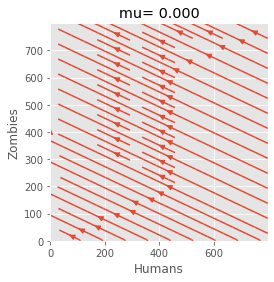

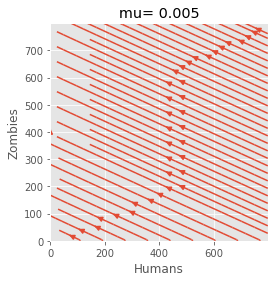

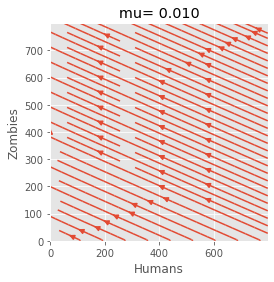

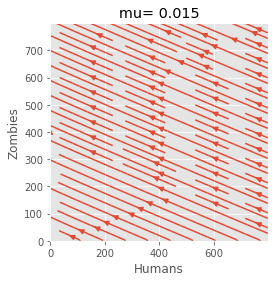

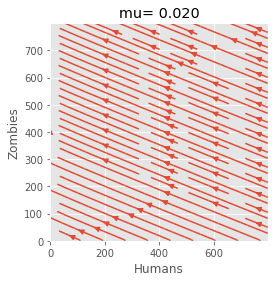

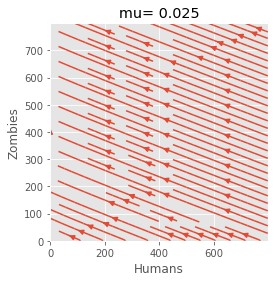

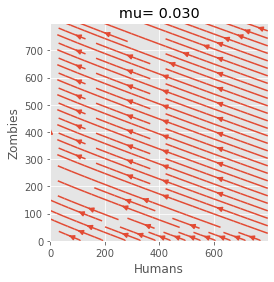

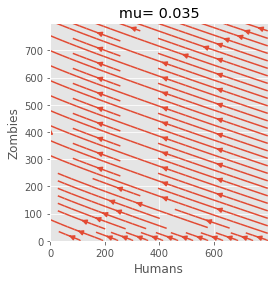

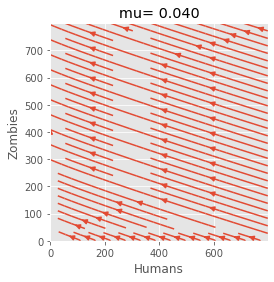

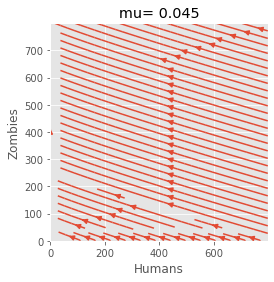

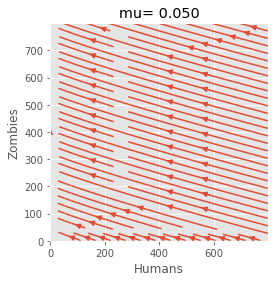

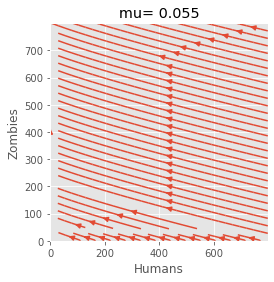

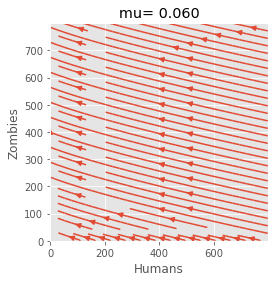

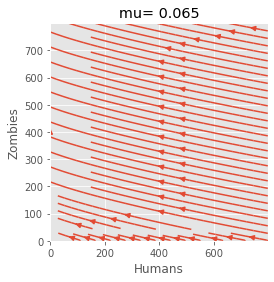

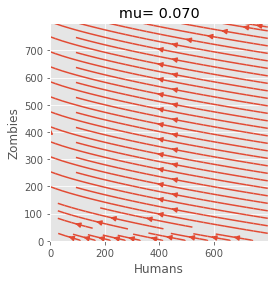

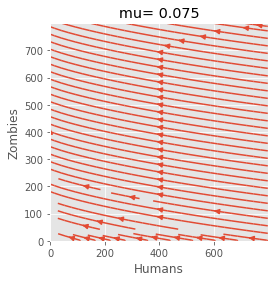

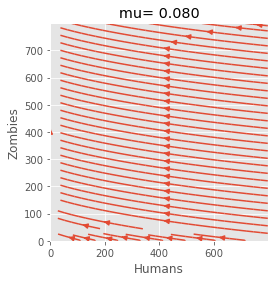

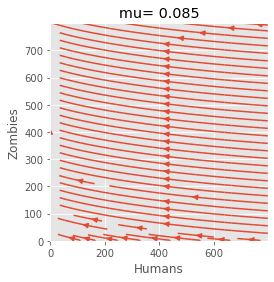

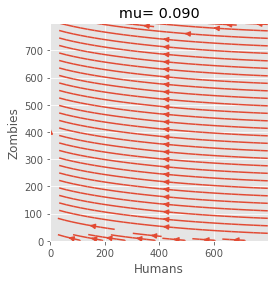

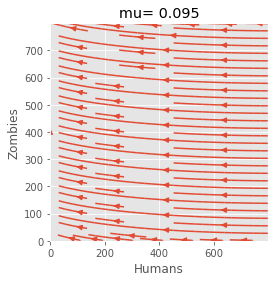

<Figure size 432x288 with 0 Axes>

##########################################
So the model reaches stability at Mu=  0.095
##########################################


In [10]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""This simple program tries to check the stability of the SZR model, 
    for the different values of Mu (perturbation parameter), starting from 0, with an increment of 0.005.
    The program will continue to run until it finds a optimal value of Mu,
    for which the SZR model reaches stability. 
    
    Reference: Allen, Robert F., Cassandra Jens, and Theodore J. Wendt. 2014.
   “Perturbations in Epidemiological Models”. Letters in Biomathematics 1 (2), 173-80.
   Link- https://doi.org/10.1080/23737867.2014.11414478.

   Part of MS Thesis at Universität Koblenz-Landau
   Note: this program uses the following libraries-  Numpy, Matplotlib
   Python Version 3.7
"""

# importing libraries
import numpy as np
from matplotlib import pyplot as plt


# Parameter values
beta = 0.0095
alpha = 0.005
zeta = 0.0001
N = 1000  #initial population

x = np.arange(0, 800, 1)
y = np.arange(0, 800, 1)
S, Z = np.meshgrid(x, y)

# range of values for Mu, with an increment of 0.005
mu_list = np.arange(0.0, 1.0, 0.005) 


for u in mu_list:
    S_dash = - beta*S*Z #SZR model differential equation
    Z_dash = zeta*(N - S - Z) + beta*S*Z - alpha*(S**(1 + u))*Z #SZR model differential equation
    plt.streamplot(S, Z, S_dash, Z_dash, density=1.0) #phase portrait
    plt.title("mu= %1.3f" %u)
    plt.axis("scaled")
    plt.draw()
    plt.xlabel("Humans")
    plt.ylabel("Zombies")
    plt.pause(0.0001)
    plt.clf()
    
    if (u > (((np.log((beta*N - zeta)/(alpha)))/(np.log(N))) - 1)):  #checking for stable value point
        break
plt.show()
print("##########################################")        
print("So the model reaches stability at Mu= ", str(u))
print("##########################################") 


__author__ = "Md Tariqul Islam"
__version__ = "1.0"
__maintainer__ = "Tariqul"
__email__ = "tariquldipu@uni-koblenz.de"
__status__ = "Final"

The bifurcation diagram for the SZR model >>>>>


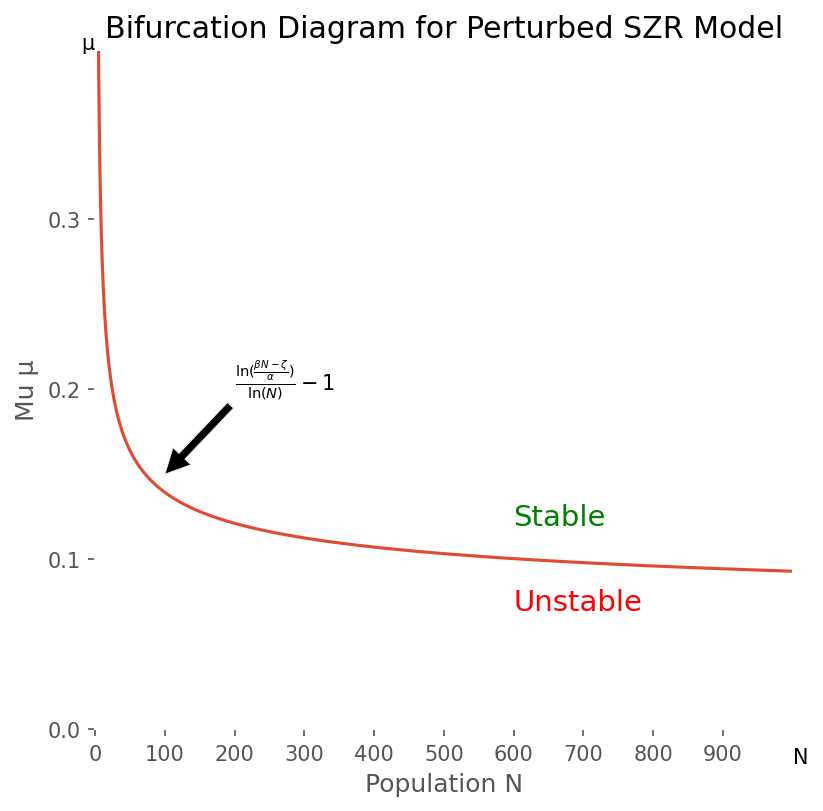

In [15]:
# Bifurcation Diagram for The Perturbed SZR Model

# importing libraries
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(6, 6), dpi=150)

print("The bifurcation diagram for the SZR model >>>>>")


# Parameter values
beta = 0.0095
alpha = 0.005
zeta = 0.0001
N = 1000  #initial population


x = np.array(range(2,1000))
y = ((np.log((beta*x - zeta)/(alpha)))/(np.log(x))) - 1
# draw bifurcation diagram
plt.plot(x,y)
plt.ylim([0, 0.4])
plt.xlim([0, 1000])
plt.yticks(np.arange(0, 0.4, 0.1))
plt.xticks(np.arange(0, 1000, 100))
plt.xlabel("Population N")
plt.ylabel("Mu " + u"\u03bc")
plt.text(600, 0.12, "Stable",
        fontsize= 14,
        color= 'green')
plt.text(600, 0.07, "Unstable",
        fontsize= 14,
        color= 'red')
plt.text(1000, -0.02, "N")
plt.text(-20, 0.4, u"\u03bc")
plt.annotate(r"$ \frac{\ln(\frac{\beta N - \zeta}{\alpha})}{\ln (N)} - 1$", xy=(100, 0.15), xytext=(200, 0.2),
            arrowprops=dict(facecolor='black', shrink=1))# theorem 1 condition
plt.title("Bifurcation Diagram for Perturbed SZR Model")
ax = plt.gca()
ax.set_facecolor('w')
ax.grid(True, which='both')
plt.show()

__author__ = "Md Tariqul Islam"
__version__ = "1.0"
__maintainer__ = "Tariqul"
__email__ = "tariquldipu@uni-koblenz.de"
__status__ = "Final"

<function matplotlib.pyplot.show(close=None, block=None)>

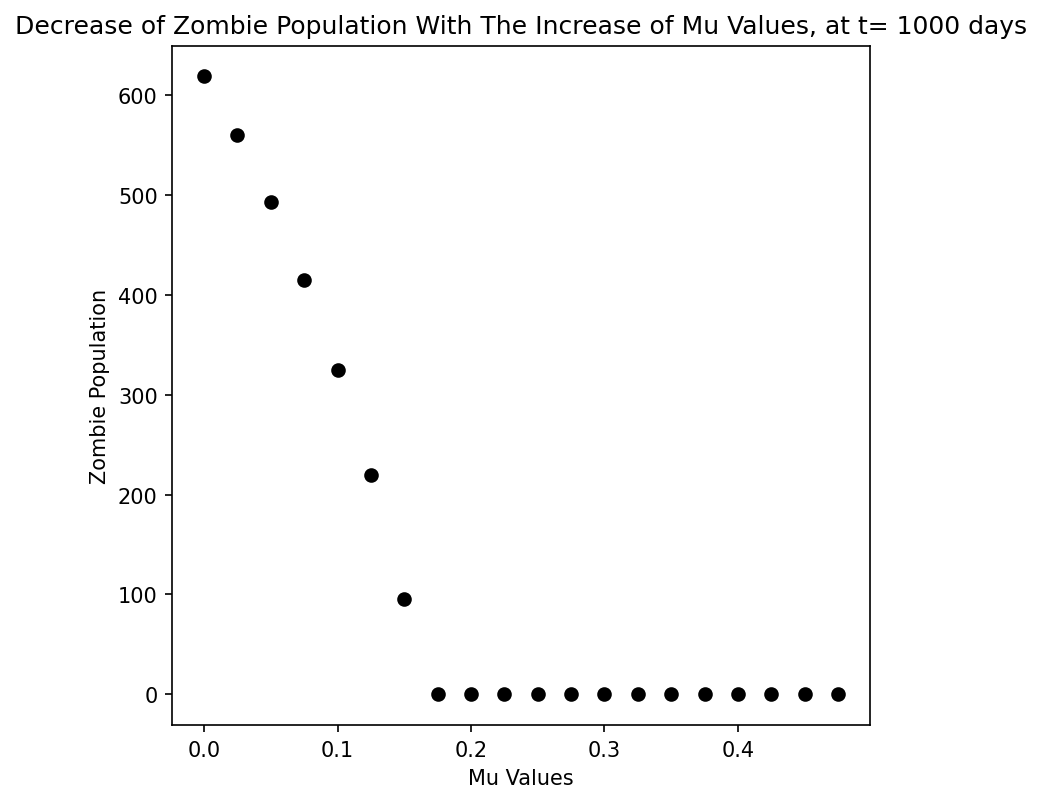

In [20]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-


"""This simple program tries to show a relation between the number of zombies and the perturbation value Mu.
    This program is calculated at the point t = 1000 days.
    It shows that, at t = 1000 days, as the value of the pertubation parameter Mu increases, the number of total
    zombies decreases. Thus, establishing the fact that the perturbation parameter has a direct impact on the
    zombie population.
    
    Reference: Allen, Robert F., Cassandra Jens, and Theodore J. Wendt. 2014.
   “Perturbations in Epidemiological Models”. Letters in Biomathematics 1 (2), 173-80.
   Link- https://doi.org/10.1080/23737867.2014.11414478.

   Part of MS Thesis at Universität Koblenz-Landau
   Note: this program uses the following libraries-  Numpy, Matplotlib, Scipy
   Python Version 3.7
"""

# importing libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(6, 6), dpi=150)
import warnings
warnings.filterwarnings("ignore")

# Generating range of values for Mu, from 0.0 upto 0.5, with an increment of 0.025
mu = np.arange(0.0, 0.5, 0.025)

# Parameter values
beta = 0.0095
alpha = 0.005
zeta = 0.0001
N = 1000  # initial population

# Defining Function of the SZR ODE
def model(t, x):
    S = x[0] # Intital Susceptible Population
    Z = x[1] # Zombies
    dsdt = - beta*S*Z # Susceptible
    dzdt = (zeta*(N - S - Z)) + (beta*S*Z) - (alpha*(S**(1 + value))*Z) # Zombies
    dxdt = [dsdt, dzdt]
    return dxdt

# Initial Condition. Susceptible= 800, Zombie= 200
x0 = [800, 200]

# Time, as in number of days. Total days= 1000
t = np.array([0, 1000])
tspan = np.linspace(t[0], t[1], 1000)

i = 0;

# empty lists
zombie_new = []
recovered_new = []

for value in mu:
    x_new = solve_ivp(model, t, x0, t_eval=tspan)
    zombie = x_new.y[1];
    zombie_new.append(zombie[999])
    #susceptible = x_new.y[0];
    #recovered_new.append((N - susceptible[999] - zombie[999]))
    
# Drawing Scatter Plot at t = 1000 days position
# Change of zombie numbers with the increase of Mu Values
# When the number of zombies reaches 0 at t= 1000 days, the model reaches stability at that Mu value
plt.plot(mu, zombie_new, 'o', color='black');
#plt.plot(mu, recovered_new, 'o', color='blue');
plt.ylabel('Zombie Population')
plt.xlabel('Mu Values')
plt.title("Decrease of Zombie Population With The Increase of Mu Values, at t= 1000 days")
ax = plt.gca()
ax.set_facecolor('w')
plt.show

__author__ = "Md Tariqul Islam"
__version__ = "1.0"
__maintainer__ = "Tariqul"
__email__ = "tariquldipu@uni-koblenz.de"
__status__ = "Final"

<ipython-input-10-71223a7d7ee9>:39: RuntimeWarning: invalid value encountered in double_scalars
  dzdt = zeta*(N - S - Z) + beta*S*Z - alpha*(S**(1 + mu))*Z # Zombies


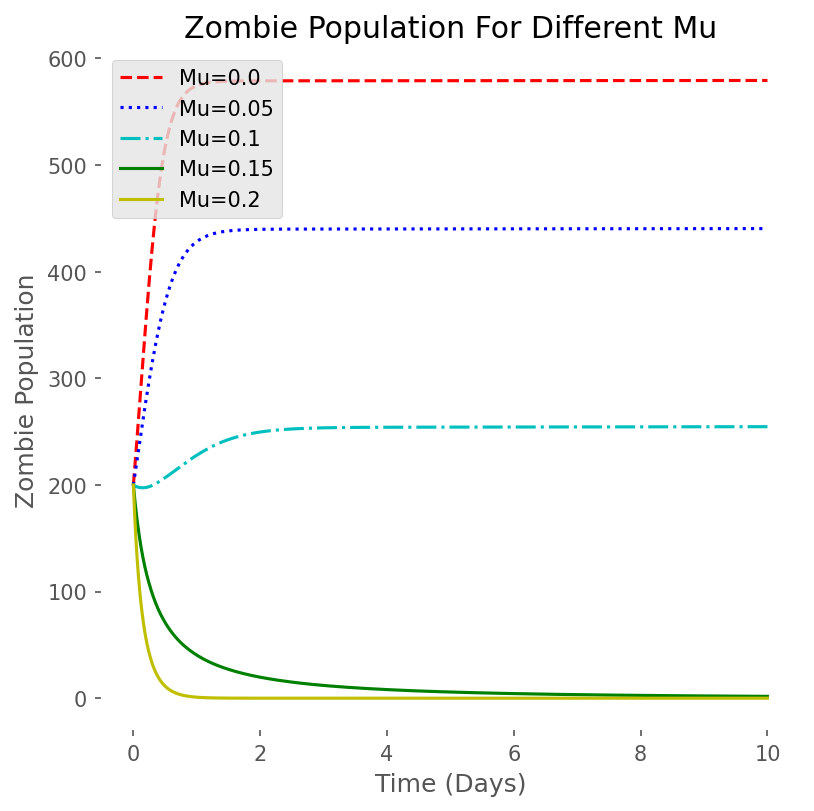

In [10]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""This simple program tries to solve the ODE of the Perturbed SZR model 
    and create a numerical solution.
    After that, this program draws the solution graph for only the Zombie Population with the gradual 
    increase of perturbation parameter. 
    This simple graph helps us to understand the actual scenario of the zombie population
    from the Perturbed SZR model with respect to the perturbation parameter.

   Part of MS Thesis at Universität Koblenz-Landau
   Note: this program uses the following libraries-  Numpy, Matplotlib, Scipy
   Python Version 3.7
"""

# Perturbed SZR Model

# importing libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(6, 6), dpi=150)
 
# For a nice looking plot
plt.style.use('ggplot')

# Parameter values
beta = 0.0095
alpha = 0.005
zeta = 0.0001
N = 1000  # initial population

# Defining Function of the SZR ODE
def model(t, x):
    S = x[0] # Intital Susceptible Population
    Z = x[1] # Zombies
    dsdt = - beta*S*Z # Susceptible
    dzdt = zeta*(N - S - Z) + beta*S*Z - alpha*(S**(1 + mu))*Z # Zombies
    dxdt = [dsdt, dzdt]
    return dxdt

# Initial Condition. Susceptible= 800, Zombie= 200
x0 = [800, 200]

# Time, as in number of days. Total days= 1000
t = np.array([0, 10])
tspan = np.linspace(t[0], t[1], 1000)


# Calcuclate zombie population for different values of Mu
mu = 0.0
x = solve_ivp(model, t, x0, t_eval=tspan)
zombie01 = x.y[1]

mu = 0.05
x = solve_ivp(model, t, x0, t_eval=tspan)
zombie02 = x.y[1]

mu = 0.1
x = solve_ivp(model, t, x0, t_eval=tspan)
zombie03 = x.y[1]

mu = 0.15
x = solve_ivp(model, t, x0, t_eval=tspan)
zombie04 = x.y[1]

mu = 0.2
x = solve_ivp(model, t, x0, t_eval=tspan)
zombie05 = x.y[1]

mu = 0.25
x = solve_ivp(model, t, x0, t_eval=tspan)
zombie06 = x.y[1]

time = x.t
# Plot
plt.plot(time, zombie01, 'r--', label="Mu=0.0")
plt.plot(time, zombie02, 'b:', label="Mu=0.05")
plt.plot(time, zombie03, 'c-.', label="Mu=0.1")
plt.plot(time, zombie04, 'g-', label="Mu=0.15")
plt.plot(time, zombie05, 'y-', label="Mu=0.2")
#plt.plot(time, zombie06, 'k', label="Mu=0.25")

plt.title('Zombie Population For Different Mu')
plt.ylabel('Zombie Population')
plt.xlabel('Time (Days)')
plt.legend(loc='best')
ax = plt.gca()
ax.set_facecolor('w')
plt.show()

__author__ = "Md Tariqul Islam"
__version__ = "1.0"
__maintainer__ = "Tariqul"
__email__ = "tariquldipu@uni-koblenz.de"
__status__ = "Final"